In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction import text
%matplotlib inline

In [7]:
data = pd.read_csv('reviews.csv', usecols = ["Id", "Review"])
data.shape

(107018, 2)

In [12]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = data['Review'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [13]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[5000:5100])

32793
['chomsky', 'choose', 'choosen', 'chooses', 'choosing', 'chop', 'chopin', 'chopped', 'chopping', 'choppy', 'chopra', 'chops', 'choral', 'chord', 'chords', 'chore', 'chores', 'chorister', 'chorus', 'chose', 'chosen', 'choses', 'chossed', 'chow', 'chowdhury', 'chris', 'chrissy', 'chrissytignor', 'christ', 'christian', 'christians', 'christine', 'christinegreat', 'christmas', 'christophe', 'christopher', 'christpher', 'chromatic', 'chrome', 'chromebook', 'chromosme', 'chromosome', 'chronic', 'chronicles', 'chronograph', 'chronological', 'chronologically', 'chronology', 'chrysanthmums', 'chuch', 'chuck', 'chuck_is_amazing', 'chuckand', 'chuckle', 'chuckling', 'chucks', 'chucky', 'chuckyou', 'chuffed', 'chug', 'chuk', 'chunck', 'chung', 'chunk', 'chunkable', 'chunked', 'chunking', 'chunks', 'chunkthank', 'chunky', 'church', 'churk', 'churn', 'ci', 'cia', 'ciao', 'cidade', 'cience', 'cilck', 'cinco', 'cinema', 'cinematography', 'cio', 'cios', 'cipher', 'ciphers', 'circle', 'circled', '

In [17]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')
def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [18]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50]) 

/home/murugesh/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


21543
["''", "'a", "'addict", "'d", "'i", "'just'", "'k", "'m", "'n", "'package'", "'s", "'t", "'the", "a'", 'aa', 'aaa', 'aaaa', 'aaargh', 'aaha', 'aalaikom', 'aalst', 'aand', 'aarabi', 'aaron', 'ab', 'aback', 'abackground', 'abahia', 'abandon', 'abandond', 'abandonend', 'abarca', 'abarcar', 'abbey', 'abbott', 'abbrevi', 'abc', 'abcdefg', 'abdalsama', 'abdc', 'abdelnaeem', 'abdomen', 'abdomin', 'abduladheem', 'abhishek', 'abid', 'abig', 'abil', 'abilti', 'abit']


In [19]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

/home/murugesh/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


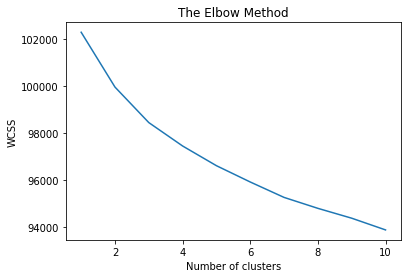

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()


In [21]:
kmeans = KMeans(n_clusters = 10, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : love, cours, veri, thank, great, realli, learn, professor, lot, way, teacher, inform, easi, amaz, good, class, just, use, help, teach, instructor, lectur, explain, understand, content
1 : cours, great, realli, veri, good, understand, help, like, best, assign, lectur, easi, inform, recommend, enjoy, use, materi, basic, video, amaz, nice, time, lot, way, content
2 : good, veri, cours, introduct, realli, beginn, basic, start, learn, teacher, content, materi, inform, pretti, easi, explan, introductori, understand, python, lectur, assign, great, exampl, class, program
3 : awesom, cours, thank, learn, realli, teacher, veri, great, instructor, lot, professor, just, love, chuck, beginn, dr, class, experi, teach, simpli, help, recommend, lectur, content, python
4 : use, veri, cours, thank, inform, realli, good, great, practic, lot, learn, easi, help, understand, clear, like, tool, basic, recommend, nice, knowledg, enjoy, content, materi, beginn
5 : veri, cours, help, inform, nice, easi, cle